## Task-2 (Baginner Level) : Stock Market Prediction and Forecasting using Stacked LSTM

## Author: Zashi Avinash Patil

## Importing Required Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#reading the data and display the records
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


## Analyzing the data

In [3]:
df.shape

(2035, 8)

In [4]:
#check the datatypes
df.dtypes

Date                     object
Open                    float64
High                    float64
Low                     float64
Last                    float64
Close                   float64
Total Trade Quantity      int64
Turnover (Lacs)         float64
dtype: object

In [5]:
#check if null values
df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [6]:
#statistical information
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
df2 = df.reset_index()['Close']

In [8]:
df2

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [9]:
#take only close column and store it in df2
df2.shape

(2035,)

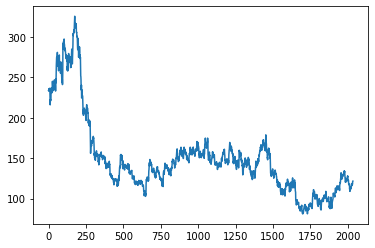

In [10]:
#Data representation using graph
plt.plot(df2)

## Feature Scaling

In [11]:
# LSTM is very sensitive to scale of data, so apply MinMax scaling

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df2 = scaler.fit_transform(np.array(df2).reshape(-1,1))

In [13]:
df2

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.1621732 ],
       [0.16319444],
       [0.16584967]])

In [14]:
df2.shape

(2035, 1)

## Splitting dataset into training and testing

In [15]:
training_size = int(len(df2)*0.65)
test_size = len(df2)-training_size
train_data, test_data = df2[0:training_size,:],df2[training_size:len(df2):1]

In [16]:
training_size, test_size

(1322, 713)

In [17]:
import numpy
#convert an array of values into a dataset matrix
def create_dataset(dataset,time_step=1):
    dataX, dataY= [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return numpy.array(dataX), numpy.array(dataY)

In [18]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [19]:
X_train.shape

(1221, 100)

In [20]:
y_train.shape

(1221,)

In [21]:
X_test.shape

(612, 100)

In [22]:
y_test.shape

(612,)

In [23]:
#reshape input to be [samples, time_step, features]which required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1],1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

## Create stacked LSTM model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error", optimizer='adam')

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
#fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100,  batch_size=64, verbose=1)

Epoch 1/100
20/20 [==============================] - 15s 285ms/step - loss: 0.0232 - val_loss: 0.0059
Epoch 2/100
20/20 [==============================] - 4s 207ms/step - loss: 0.0040 - val_loss: 0.0018
Epoch 3/100
20/20 [==============================] - 4s 207ms/step - loss: 0.0019 - val_loss: 7.9373e-04
Epoch 4/100
20/20 [==============================] - 4s 208ms/step - loss: 0.0021 - val_loss: 0.0011
Epoch 5/100
20/20 [==============================] - 4s 220ms/step - loss: 0.0017 - val_loss: 0.0011
Epoch 6/100
20/20 [==============================] - 5s 258ms/step - loss: 0.0014 - val_loss: 9.9914e-04
Epoch 7/100
20/20 [==============================] - 4s 219ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 8/100
20/20 [==============================] - 4s 223ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 9/100
20/20 [==============================] - 4s 211ms/step - loss: 0.0013 - val_loss: 9.6596e-04
Epoch 10/100
20/20 [==============================] - 4s 213ms/step - loss: 0.

20/20 [==============================] - 4s 212ms/step - loss: 3.1501e-04 - val_loss: 3.8243e-04
Epoch 77/100
20/20 [==============================] - 4s 213ms/step - loss: 2.9329e-04 - val_loss: 2.5216e-04
Epoch 78/100
20/20 [==============================] - 4s 215ms/step - loss: 3.0307e-04 - val_loss: 2.8173e-04
Epoch 79/100
20/20 [==============================] - 4s 211ms/step - loss: 3.3788e-04 - val_loss: 3.8943e-04
Epoch 80/100
20/20 [==============================] - 4s 210ms/step - loss: 3.1893e-04 - val_loss: 2.7292e-04
Epoch 81/100
20/20 [==============================] - 4s 211ms/step - loss: 4.3637e-04 - val_loss: 2.7016e-04
Epoch 82/100
20/20 [==============================] - 4s 210ms/step - loss: 3.0156e-04 - val_loss: 3.0485e-04
Epoch 83/100
20/20 [==============================] - 4s 208ms/step - loss: 2.7501e-04 - val_loss: 2.5996e-04
Epoch 84/100
20/20 [==============================] - 4s 218ms/step - loss: 3.0169e-04 - val_loss: 2.4615e-04
Epoch 85/100
20/20 [===

In [31]:
#Do the prediction and check performance matrix
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

20/20 [==============================] - 1s 50ms/step


In [32]:
# transform to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [33]:
#calculate RNSE value
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

167.57403588744367

In [34]:
#Test data RNSE
math.sqrt(mean_squared_error(y_test, test_predict))

116.50349704092453

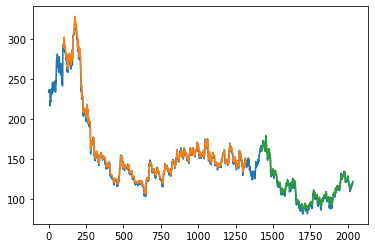

In [36]:
#Graph plot
#shift train predictions for plotting
look_back = 100
trainPredictPlot =numpy.empty_like(df2)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

#shift test prediction for plotting
testPredictPlot = numpy.empty_like(df2)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df2)-1, :] = test_predict

#plot baseline and prediction
plt.plot(scaler.inverse_transform(df2))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()